In [31]:
import numpy as np 
import pandas as pd
i=1

outputs= np.random.randn(2, 2, 5) 


batch_size, sequence_len, num_channels = outputs.shape
batch_id_flat= np.full((batch_size*sequence_len*num_channels), i)  # 用 batch 的索引填充 batch_id

sample_id_flat = np.repeat(np.arange(batch_size), sequence_len * num_channels) 
sequence_id_flat = np.repeat(np.arange(sequence_len),batch_size*num_channels) 
channel_id_flat = np.tile(np.arange(num_channels), batch_size * sequence_len)
data_flat = outputs.reshape(-1)

    # 创建 DataFrame
df = pd.DataFrame({
        'batch_id': batch_id_flat,
        'sample_id': sample_id_flat,
        'sequence_id': sequence_id_flat,
        'channel_id': channel_id_flat,
        'data': data_flat
    })
print(outputs)
print(df)

[[[-0.61975831 -0.06777101 -0.48174887  0.72134508 -0.01452728]
  [-1.96402697 -0.25140473 -1.96082615  1.22098664 -1.31743535]]

 [[-1.15065446 -1.33003986 -0.14723578 -0.77580016 -0.73928002]
  [ 1.65142884  0.04233058  0.01483168  0.44413036 -0.19198959]]]
    batch_id  sample_id  sequence_id  channel_id      data
0          1          0            0           0 -0.619758
1          1          0            0           1 -0.067771
2          1          0            0           2 -0.481749
3          1          0            0           3  0.721345
4          1          0            0           4 -0.014527
5          1          0            0           0 -1.964027
6          1          0            0           1 -0.251405
7          1          0            0           2 -1.960826
8          1          0            0           3  1.220987
9          1          0            0           4 -1.317435
10         1          1            1           0 -1.150654
11         1          1         

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sequences_from_dict(data_dict, sample_id, channel_id):
    """
    可视化字典中的多个 numpy 数组，指定 sample_id 和 channel_id 对应的序列。
    
    参数:
    - data_dict: 一个字典，包含多个形状为 (batch_size, sequence_len, num_channels) 的 numpy 数组
    - sample_id: 选择的样本 ID (在 batch_size 范围内)
    - channel_id: 选择的通道 ID (在 num_channels 范围内)
    """
    plt.figure(figsize=(12, 6))

    # 遍历字典中的每个 numpy 数组
    for name, data in data_dict.items():
        # 提取指定 sample_id 和 channel_id 对应的序列
        sequence = data[sample_id, :, channel_id]
        
        # 创建一个序列的索引
        sequence_len = len(sequence)
        sequence_idx = np.arange(sequence_len)
        
        # 绘制每个数据集的预测序列
        sns.lineplot(x=sequence_idx, y=sequence, label=name)

    # 添加标签和标题
    plt.xlabel('Sequence Index')
    plt.ylabel('Value')
    plt.title(f'Sequence Visualization (Sample {sample_id}, Channel {channel_id})')
    plt.legend()
    plt.show()



In [4]:
print(a.shape)

(2785, 96, 7)


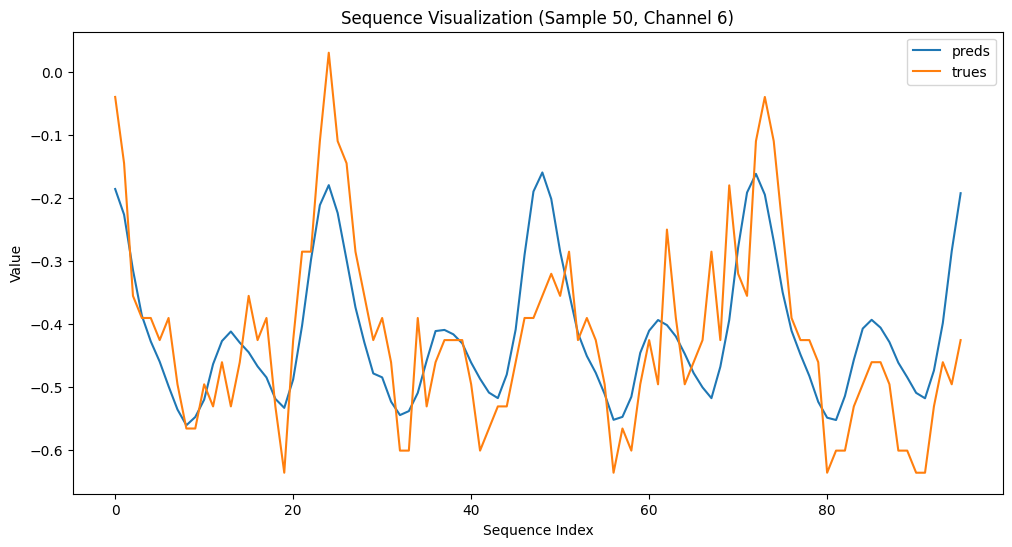

In [8]:
import numpy as np
a=np.load('./Electricity_FullShot/electricity_96_96preds.npy')
b=np.load('./Electricity_FullShot/electricity_96_96trues.npy')
#c=np.load('./ETTh1_ZeroShot/ETTh1_96_96trues.npy')
data_dict={'preds':a,'trues':b}#,'zeroshot':c}
plot_sequences_from_dict(data_dict,50,6
                        )

In [30]:
print(df)

         batch_id  sample_id  sequence_id  channel_id      data     truth
0             0.0        0.0          0.0         0.0  0.422183  0.351341
1             0.0        0.0          0.0         1.0  0.486243  0.699468
2             0.0        0.0          0.0         2.0  0.470651  0.463911
3             0.0        0.0          0.0         3.0  0.353960  0.553273
4             0.0        0.0          0.0         4.0 -0.001223 -0.396437
...           ...        ...          ...         ...       ...       ...
1871515    2784.0        0.0         95.0         2.0  0.875530  0.869616
1871516    2784.0        0.0         95.0         3.0 -0.066047  0.129162
1871517    2784.0        0.0         95.0         4.0  0.629051  1.180470
1871518    2784.0        0.0         95.0         5.0 -0.438667 -0.429129
1871519    2784.0        0.0         95.0         6.0 -1.311271 -1.613608

[1871520 rows x 6 columns]
